In [62]:
#importing packages
import pandas as pd
import numpy as np
import tabula


import matplotlib.pyplot as plt
from plotnine import *

In [78]:
#loading in and modifying eligibility data
elig_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/rted_dta_kff.csv")
elig_dta=elig_dta[['Location', "State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)"]]
elig_dta=elig_dta.drop([0])
#elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'].str.replace('Not reported',"NaN")
elig_dta=elig_dta.replace({"Not reported": np.nan})
elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'].str.replace('Yes','1')
elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'].str.replace('No','0')

elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = pd.to_numeric(elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'], downcast="float")
elig_dta.rename(columns={"Location":"State", "State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)":"Real-Time Eligibility Determination Ability (<24 Hours)"}, inplace=True)  #renaming the columns

elig_dta

,State,Real-Time Eligibility Determination Ability (<24 Hours)
1,Alabama,1.0
2,Alaska,0.0
3,Arizona,1.0
4,Arkansas,1.0
5,California,1.0
6,Colorado,1.0
7,Connecticut,1.0
8,Delaware,1.0
9,District of Columbia,1.0
10,Florida,1.0


In [79]:
#reading in MCO data
mco_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/mco_dta_kff.csv")
mco_dta.loc[mco_dta['Total Medicaid MCOs'] > 0, 'Total Medicaid MCOs'] = 1
mco_dta.loc[mco_dta['Total Medicaid MCOs'] != 1, 'Total Medicaid MCOs'] = 0
mco_dta=mco_dta.drop([0])
mco_dta.rename(columns={"Location":"State", "Total Medicaid MCOs":"Managed Care"}, inplace=True)  #renaming the columns
mco_dta

,State,Managed Care
1,Alabama,0.0
2,Alaska,0.0
3,Arizona,1.0
4,Arkansas,0.0
5,California,1.0
6,Colorado,1.0
7,Connecticut,0.0
8,Delaware,1.0
9,District of Columbia,1.0
10,Florida,1.0


In [63]:
#reading in cms enrollment data
enroll_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/cms_enrollment_dta.csv")
enroll_dta=enroll_dta[enroll_dta['final_report'] == "Y"]
enroll_dta=enroll_dta[['state_name', "report_date", "state_expanded_medicaid", "total_medicaid_enrollment"]]
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('N','0')
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('Y','1')
enroll_dta.rename(columns={"state_name":"State"}, inplace=True)  #renaming the columns
enroll_dta['state_expanded_medicaid'] = pd.to_numeric(enroll_dta['state_expanded_medicaid'], downcast="float")

enroll_dta


,State,report_date,state_expanded_medicaid,total_medicaid_enrollment
0,Alabama,2013-09-01,0.0,NaN
2,Alabama,2017-06-01,0.0,731915.0
4,Alabama,2017-07-01,0.0,735619.0
6,Alabama,2017-08-01,0.0,734934.0
8,Alabama,2017-09-01,0.0,734507.0
...,...,...,...,...
4743,Wyoming,2021-01-01,0.0,60770.0
4745,Wyoming,2021-02-01,0.0,61839.0
4746,Wyoming,2021-03-01,0.0,62659.0
4749,Wyoming,2021-04-01,0.0,63440.0


## 2018-2020 enrollment data

In [67]:
enroll_dta_18_20=enroll_dta[(enroll_dta.report_date=="2018-02-01") | (enroll_dta.report_date=="2018-03-01") | (enroll_dta.report_date=="2018-04-01") | (enroll_dta.report_date=="2019-02-01") | (enroll_dta.report_date=="2019-03-01") | (enroll_dta.report_date=="2019-04-01") | (enroll_dta.report_date=="2020-02-01") | (enroll_dta.report_date=="2020-03-01") | (enroll_dta.report_date=="2020-04-01")]
enroll_dta_18_20=enroll_dta_18_20.reset_index()
enroll_dta_18_20=enroll_dta_18_20.drop(columns=['index'])
enroll_dta_18_20

,State,report_date,state_expanded_medicaid,total_medicaid_enrollment
0,Alabama,2018-02-01,0.0,722951.0
1,Alabama,2018-03-01,0.0,725440.0
2,Alabama,2018-04-01,0.0,726911.0
3,Alabama,2019-02-01,0.0,739062.0
4,Alabama,2019-03-01,0.0,738636.0
...,...,...,...,...
454,Wyoming,2019-03-01,0.0,53162.0
455,Wyoming,2019-04-01,0.0,53354.0
456,Wyoming,2020-02-01,0.0,51626.0
457,Wyoming,2020-03-01,0.0,51698.0


In [75]:
partisan_lean=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/partisan_lean.csv")
partisan_lean=partisan_lean.drop(columns=['Unnamed: 0'])
partisan_lean

,State,Partisan Lean
0,District of Columbia,68.2
1,Massachusetts,32.6
2,Hawaii,31.6
3,Vermont,27.5
4,Maryland,25.9
5,California,25.5
6,Rhode Island,24.0
7,New York,20.0
8,Delaware,13.7
9,Illinois,13.4


# FiveThirtyEight Data on Political Leaning

In [68]:
#downloading table from 538
url="https://fivethirtyeight.com/features/how-red-or-blue-is-your-state-your-congressional-district/"
pol_leaning_dta=pd.read_html(url)
pol_leaning=pd.concat(pol_leaning_dta, ignore_index=True)

In [69]:
pol_leaning=pol_leaning[['State', "Partisan Lean", "State.1", "Partisan Lean.1"]]
pol_leaning1=pol_leaning[["State", "Partisan Lean"]]
pol_leaning2=pol_leaning[["State.1", "Partisan Lean.1"]]
pol_leaning2.rename(columns={"State.1":"State", "Partisan Lean.1":"Partisan Lean"}, inplace=True)  #renaming the columns
pol_leaning2

/Users/carolineadams/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,State,Partisan Lean
0,Arizona,R+7.6
1,Florida,R+7.6
2,Iowa,R+9.7
3,Texas,R+12.0
4,Ohio,R+12.4
5,Alaska,R+14.6
6,South Carolina,R+18.6
7,Indiana,R+20.0
8,Montana,R+20.0
9,Mississippi,R+20.3


In [70]:
pol_lean=pol_leaning1.append(pol_leaning2)
#pol_lean.replace({"D+": "", "R+": "-"})
pol_lean['Partisan Lean'] = pol_lean['Partisan Lean'].str.replace('D+','')
pol_lean['Partisan Lean'] = pol_lean['Partisan Lean'].str.replace('R+','-')
pol_lean['Partisan Lean'] = pol_lean['Partisan Lean'].str.replace('+','')
pol_lean['Partisan Lean'] = pd.to_numeric(pol_lean['Partisan Lean'], downcast="float")
pol_lean=pol_lean.reset_index()
pol_lean=pol_lean[['State', 'Partisan Lean']]
pol_lean=pol_lean.drop([51])
pol_lean

<ipython-input-70-77ace6ee64af>:3: FutureWarning: The default value of regex will change from True to False in a future version.
<ipython-input-70-77ace6ee64af>:4: FutureWarning: The default value of regex will change from True to False in a future version.
<ipython-input-70-77ace6ee64af>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,State,Partisan Lean
0,District of Columbia,68.199997
1,Massachusetts,32.599998
2,Hawaii,31.600000
3,Vermont,27.500000
4,Maryland,25.900000
5,California,25.500000
6,Rhode Island,24.000000
7,New York,20.000000
8,Delaware,13.700000
9,Illinois,13.400000


In [73]:
pol_lean.to_csv("partisan_lean.csv")

In [42]:
pol_lean['Party of Partisan Lean'] = np.where(pol_lean['Partisan Lean']< 0, "Republican", "Democrat")
pol_lean.to_csv('pol_lean.csv')

# Census Data


# KFF Medicaid Expansion Data

In [3]:
exp_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/med_exp_dta_kff.csv")

In [ ]:
# exp_dta['Status of Medicaid Expansion Decision'] = exp_dta['Status of Medicaid Expansion Decision'].str.replace('Not Adopted','0')
exp_dta['Status of Medicaid Expansion Decision'] = exp_dta['Status of Medicaid Expansion Decision'].str.replace('Adopted','1')
exp_dta['Status of Medicaid Expansion Decision'] = pd.to_numeric(exp_dta['Status of Medicaid Expansion Decision'], downcast="float")
exp_dta.rename(columns={"Location":"State", "Status of Medicaid Expansion Decision":"med_exp_status"}, inplace=True)  #renaming the columns

exp_dta

# CMS App time Data

In [11]:
apptime19="/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/2019-cms-application-time-report.pdf"
table19=tabula.read_pdf(apptime19,pages="all")
table19
tabula.convert_into(apptime19, "2019_cms_app_time.csv", output_format="csv", pages='all')

In [13]:
table19[0]

,Unnamed: 0,Unnamed: 1,Percent of,Percent of.1,Percent of.2,Percent of.3,Percent of.4
0,NaN,NaN,Determinations,Determinations,Determinations,Determinations,Determinations
1,State,Month,Processed,Processed,Processed,Processed,Processed
2,NaN,NaN,< 24 hours,1 - 7 Days,8 - 30 Days,31- 45 Days,45+ Days
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,February*,81.2%,8.0%,8.9%,1.0%,1.0%
5,Alabama,March*,86.0%,7.4%,5.5%,0.6%,0.4%
6,NaN,April*,84.1%,9.8%,5.9%,0.1%,0.1%
7,NaN,February*,8.3%,14.1%,11.8%,4.7%,61.1%
8,Alaska,March*,7.1%,10.2%,10.7%,4.0%,67.9%
9,NaN,April*,8.1%,12.4%,16.1%,5.2%,58.1%


In [12]:
df_19=pd.concat(table19)
df_19

,Unnamed: 0,Unnamed: 1,Percent of,Percent of.1,Percent of.2,Percent of.3,Percent of.4,Unnamed: 2,State,Month,...,Percent of\rDeterminations\rProcessed\r45+ Days,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,Determinations,Determinations,Determinations,Determinations,Determinations,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,Month,Processed,Processed,Processed,Processed,Processed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,< 24 hours,1 - 7 Days,8 - 30 Days,31- 45 Days,45+ Days,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,February*,81.2%,8.0%,8.9%,1.0%,1.0%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,NaN,April*,25.8%,13.0%,45.7%,5.9%,9.5%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,February,31.8%,16.2%,26.3%,7.8%,17.9%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,National,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Total,March,47.4%,12.9%,20.9%,6.3%,12.5%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2018 eligibility determination data

In [83]:
elig_det_dta_18=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/state_app_time_data2018.csv")

elig_det_dta_18.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
#elig_det_dta_18['Year']=2018

elig_det_dta_18['Month'] = elig_det_dta_18['Month'].str.replace('February','2018-02-01')
elig_det_dta_18['Month'] = elig_det_dta_18['Month'].str.replace('March','2018-03-01')
elig_det_dta_18['Month'] = elig_det_dta_18['Month'].str.replace('April','2018-04-01')
elig_det_dta_18.rename(columns={"Month":"Date"}, inplace=True)  #renaming the columns


elig_det_dta_18

,State,Date,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
0,Alabama,2018-02-01,74.4,15.7,8.1,1.0,0.8
1,Alabama,2018-03-01,74.8,15.8,8.0,1.0,0.5
2,Alabama,2018-04-01,75.0,15.3,8.2,0.8,0.7
3,Alaska,2018-02-01,8.7,28.5,24.0,6.3,32.5
4,Alaska,2018-03-01,12.1,24.8,25.5,5.7,32.0
...,...,...,...,...,...,...,...
151,Wyoming,2018-03-01,42.8,32.9,14.1,2.7,7.4
152,Wyoming,2018-04-01,51.5,21.2,21.9,1.8,3.7
153,National Total,2018-02-01,30.8,15.1,27.2,8.7,18.2
154,National Total,2018-03-01,30.0,15.8,25.2,9.3,19.7


## 2019 eligibility determination data

In [84]:
elig_det_dta_19=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/state_app_time_dta2019.csv")
elig_det_dta_19.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
elig_det_dta_19['Percent of Determinations Processed within 24 Hours']=elig_det_dta_19['Percent of Determinations Processed within 24 Hours']*100
elig_det_dta_19['Percent of Determinations Processed Between 1 and 7 Days']=elig_det_dta_19['Percent of Determinations Processed Between 1 and 7 Days']*100
elig_det_dta_19['Percent of Determinations Processed Between 8 and 30 Days']=elig_det_dta_19['Percent of Determinations Processed Between 8 and 30 Days']*100
elig_det_dta_19['Percent of Determinations Processed Between 31 and 45 Days']=elig_det_dta_19['Percent of Determinations Processed Between 31 and 45 Days']*100
elig_det_dta_19['Percent of Determinations Processed After 45 Days']=elig_det_dta_19['Percent of Determinations Processed After 45 Days']*100
#elig_det_dta_19['Year']=2019

elig_det_dta_19['Month'] = elig_det_dta_19['Month'].str.replace('February','2019-02-01')
elig_det_dta_19['Month'] = elig_det_dta_19['Month'].str.replace('March','2019-03-01')
elig_det_dta_19['Month'] = elig_det_dta_19['Month'].str.replace('April','2019-04-01')
elig_det_dta_19.rename(columns={"Month":"Date"}, inplace=True)  #renaming the columns
elig_det_dta_19

,State,Date,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
0,Alabama,2019-02-01,81.0,8.0,9.0,1.0,1.0
1,Alabama,2019-03-01,86.0,7.0,6.0,1.0,0.0
2,Alabama,2019-04-01,84.0,10.0,6.0,0.0,0.0
3,Alaska,2019-02-01,8.0,14.0,12.0,5.0,61.0
4,Alaska,2019-03-01,7.0,10.0,11.0,4.0,68.0
...,...,...,...,...,...,...,...
150,Wyoming,2019-02-01,29.5,12.7,29.7,8.0,20.1
151,Wyoming,2019-03-01,31.5,16.9,35.8,2.0,13.7
152,Wyoming,2019-04-01,25.8,13.0,45.7,5.9,9.5
153,National Total,2019-02-01,31.8,16.2,26.3,7.8,17.9


## 2020 eligibility determination data

In [85]:
elig_det_dta_20=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/state_app_time_data2020.csv")

elig_det_dta_20.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
#elig_det_dta_20['Year']=2020

elig_det_dta_20['Month'] = elig_det_dta_20['Month'].str.replace('February','2020-02-01')
elig_det_dta_20['Month'] = elig_det_dta_20['Month'].str.replace('March','2020-03-01')
elig_det_dta_20['Month'] = elig_det_dta_20['Month'].str.replace('April','2020-04-01')
elig_det_dta_20.rename(columns={"Month":"Date"}, inplace=True)  #renaming the columns
elig_det_dta_20

,State,Date,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
0,Alabama,2020-02-01,75.1,9.9,11.0,2.7,1.3
1,Alabama,2020-03-01,76.5,9.6,11.4,1.7,0.8
2,Alabama,2020-04-01,76.4,9.8,11.0,1.7,1.1
3,Alaska,2020-02-01,13.5,17.6,37.8,4.7,26.4
4,Alaska,2020-03-01,9.2,18.5,28.2,13.0,31.1
...,...,...,...,...,...,...,...
151,Wyoming,2020-03-01,48.9,19.1,22.4,4.5,5.0
152,Wyoming,2020-04-01,59.3,24.6,11.0,2.6,2.5
153,National Total,2020-02-01,44.7,12.4,20.6,6.5,15.8
154,National Total,2020-03-01,47.0,13.8,19.7,5.9,13.6


In [86]:
all_elig_det_dta=elig_det_dta_18.append(elig_det_dta_19)

all_elig_det_dta=all_elig_det_dta.append(elig_det_dta_20)
all_elig_det_dta


,State,Date,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
0,Alabama,2018-02-01,74.4,15.7,8.1,1.0,0.8
1,Alabama,2018-03-01,74.8,15.8,8.0,1.0,0.5
2,Alabama,2018-04-01,75.0,15.3,8.2,0.8,0.7
3,Alaska,2018-02-01,8.7,28.5,24.0,6.3,32.5
4,Alaska,2018-03-01,12.1,24.8,25.5,5.7,32.0
...,...,...,...,...,...,...,...
151,Wyoming,2020-03-01,48.9,19.1,22.4,4.5,5.0
152,Wyoming,2020-04-01,59.3,24.6,11.0,2.6,2.5
153,National Total,2020-02-01,44.7,12.4,20.6,6.5,15.8
154,National Total,2020-03-01,47.0,13.8,19.7,5.9,13.6


In [98]:
all_dta_18_20=enroll_dta_18_20.merge(partisan_lean, how="outer", on="State")
all_dta_18_20=all_dta_18_20.merge(elig_dta, how="outer", on="State")
all_dta_18_20=all_dta_18_20.merge(mco_dta, how="outer", on="State")
all_dta_18_20.rename(columns={"report_date":"Date"}, inplace=True)  #renaming the columns
all_dta_18_20=all_dta_18_20.merge(mco_dta, how="outer", on="State")
all_dta_18_20=all_dta_18_20.merge(all_elig_det_dta, how="outer", on=["State", "Date"])
all_dta_18_20['most_det_complete_oneweek']=np.where(all_dta_18_20['Percent of Determinations Processed within 24 Hours']+all_dta_18_20['Percent of Determinations Processed Between 1 and 7 Days']>50, 1, 0)
#conditions = [(all_dta_18_20['Percent of Determinations Processed within 24 Hours']+all_dta_18_20['Percent of Determinations Processed Between 1 and 7 Days']>50)]
#values = [1,0]
#all_dta_18_20['most_det_complete_oneweek']
               
all_dta_18_20=all_dta_18_20.drop(columns=['Percent of Determinations Processed within 24 Hours', "Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed After 45 Days", "Managed Care_y"])
all_dta_18_20.rename(columns={"Managed Care_x":"managed_care"}, inplace=True)  #renaming the columns

all_dta_18_20

,State,Date,state_expanded_medicaid,total_medicaid_enrollment,Partisan Lean,Real-Time Eligibility Determination Ability (<24 Hours),managed_care,most_det_complete_oneweek
0,Alabama,2018-02-01,0.0,722951.0,-29.6,1.0,0.0,1
1,Alabama,2018-03-01,0.0,725440.0,-29.6,1.0,0.0,1
2,Alabama,2018-04-01,0.0,726911.0,-29.6,1.0,0.0,1
3,Alabama,2019-02-01,0.0,739062.0,-29.6,1.0,0.0,1
4,Alabama,2019-03-01,0.0,738636.0,-29.6,1.0,0.0,1
...,...,...,...,...,...,...,...,...
462,National Total,2019-02-01,NaN,NaN,NaN,NaN,NaN,0
463,National Total,2019-03-01,NaN,NaN,NaN,NaN,NaN,1
464,National Total,2020-02-01,NaN,NaN,NaN,NaN,NaN,1
465,National Total,2020-03-01,NaN,NaN,NaN,NaN,NaN,1


### 2018 national totals

In [31]:
nat_total_18=elig_det_dta_18[elig_det_dta_18.State== "National Total"]
nat_total_18=nat_total_18.groupby("State")
nat_mean_18=nat_total_18.mean()
nat_mean_18=nat_mean_18.reset_index()
nat_mean_18=nat_mean_18.drop(columns=["Year"])
nat_mean_18.set_index('State', inplace=True)
nat_mean_18_t=nat_mean_18.transpose()
nat_mean_18_t

State,National Total
Percent of Determinations Processed within 24 Hours,30.933333
Percent of Determinations Processed Between 1 and 7 Days,15.900000
Percent of Determinations Processed Between 8 and 30 Days,26.000000
Percent of Determinations Processed Between 31 and 45 Days,8.600000
Percent of Determinations Processed After 45 Days,18.600000


### 2018 national totals with year

In [41]:
nat_total_18=elig_det_dta_18[elig_det_dta_18.State== "National Total"]
nat_total_18=nat_total_18.groupby("State")
nat_mean_18=nat_total_18.mean()
nat_mean_18=nat_mean_18.reset_index()
nat_mean_18.set_index('State', inplace=True)
nat_mean_18

,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days,Year
State,,,,,,
National Total,30.933333,15.9,26.0,8.6,18.6,2018


### 2018 state averages

In [26]:
grouped_18 = elig_det_dta_18.groupby("State")
means_18 = grouped_18.mean()

means_18 = means_18.reset_index()
means_18=means_18.drop(columns=['Year'])
means_18

,State,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
0,Alabama,74.733333,15.600000,8.100000,0.933333,0.666667
1,Alaska,9.933333,25.866667,24.600000,5.833333,33.866667
2,Arizona,45.966667,11.800000,20.800000,16.500000,4.900000
3,Arkansas,NaN,NaN,NaN,NaN,NaN
4,California,22.666667,19.266667,31.900000,14.500000,11.666667
5,Colorado,51.166667,24.133333,17.966667,3.000000,3.733333
6,Connecticut,89.933333,6.533333,2.533333,0.433333,0.600000
7,Delaware,27.733333,33.400000,38.866667,0.000000,0.000000
8,District of Columbia,78.533333,4.733333,10.833333,4.700000,1.166667
9,Florida,38.400000,22.433333,30.633333,4.900000,3.633333


In [27]:
means_18.set_index('State',inplace=True)
means_18_t=means_18.transpose()
means_18_t

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Percent of Determinations Processed within 24 Hours,74.733333,9.933333,45.966667,NaN,22.666667,51.166667,89.933333,27.733333,78.533333,38.400000,...,0.000000,NaN,19.000000,22.633333,75.366667,3.100000,86.833333,26.533333,38.566667,39.633333
Percent of Determinations Processed Between 1 and 7 Days,15.600000,25.866667,11.800000,NaN,19.266667,24.133333,6.533333,33.400000,4.733333,22.433333,...,66.933333,NaN,26.200000,36.066667,0.533333,8.000000,4.466667,36.166667,15.766667,22.100000
Percent of Determinations Processed Between 8 and 30 Days,8.100000,24.600000,20.800000,NaN,31.900000,17.966667,2.533333,38.866667,10.833333,30.633333,...,27.000000,NaN,47.400000,35.866667,1.866667,17.433333,5.900000,28.633333,34.200000,21.133333
Percent of Determinations Processed Between 31 and 45 Days,0.933333,5.833333,16.500000,NaN,14.500000,3.000000,0.433333,0.000000,4.700000,4.900000,...,5.833333,NaN,4.933333,3.733333,1.266667,15.566667,1.300000,5.266667,10.666667,5.766667
Percent of Determinations Processed After 45 Days,0.666667,33.866667,4.900000,NaN,11.666667,3.733333,0.600000,0.000000,1.166667,3.633333,...,0.300000,NaN,2.466667,1.666667,20.933333,55.866667,1.533333,3.433333,0.833333,11.333333


### 2019 national totals

In [21]:
nat_total_19=elig_det_dta_19[elig_det_dta_19.State== "National Total"]
nat_total_19=nat_total_19.groupby("State")
nat_mean_19=nat_total_19.mean()
nat_mean_19=nat_mean_19.reset_index()
nat_mean_19=nat_mean_19.drop(columns=["Year"])

nat_mean_19

,State,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
0,National Total,39.6,14.55,23.6,7.05,15.2


### 2019 national totals with year

In [42]:
nat_total_19=elig_det_dta_19[elig_det_dta_19.State== "National Total"]
nat_total_19=nat_total_19.groupby("State")
nat_mean_19=nat_total_19.mean()
nat_mean_19=nat_mean_19.reset_index()

nat_mean_19

,State,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days,Year
0,National Total,39.6,14.55,23.6,7.05,15.2,2019


### 2019 state averages

In [23]:
grouped_19 = elig_det_dta_19.groupby("State")
means_19 = grouped_19.mean()

means_19 = means_19.reset_index()
means_19=means_19.drop(columns=["Year"])
means_19

,State,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
0,Alabama,83.666667,8.333333,7.000000,0.666667,0.333333
1,Alaska,7.666667,12.000000,13.000000,4.666667,62.333333
2,Arizona,39.666667,15.000000,34.000000,7.000000,5.000000
3,Arkansas,38.666667,30.000000,22.000000,7.000000,2.333333
4,California,20.666667,19.000000,33.000000,13.666667,14.000000
5,Colorado,41.666667,29.333333,20.333333,4.666667,4.666667
6,Connecticut,96.333333,2.333333,1.000000,0.000000,0.000000
7,Delaware,29.666667,33.333333,37.000000,0.000000,0.000000
8,District of Columbia,76.666667,4.333333,11.666667,5.666667,1.333333
9,Florida,37.666667,25.666667,30.333333,4.000000,2.666667


In [24]:
means_19.set_index('State',inplace=True)

means_19_t=means_19.transpose()

In [25]:
means_19_t

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Percent of Determinations Processed within 24 Hours,83.666667,7.666667,39.666667,38.666667,20.666667,41.666667,96.333333,29.666667,76.666667,37.666667,...,0.000000,NaN,20.433333,32.633333,42.45,7.100000,86.300000,26.033333,40.700000,28.933333
Percent of Determinations Processed Between 1 and 7 Days,8.333333,12.000000,15.000000,30.000000,19.000000,29.333333,2.333333,33.333333,4.333333,25.666667,...,64.166667,NaN,26.600000,30.466667,6.30,11.966667,4.366667,31.966667,15.800000,14.200000
Percent of Determinations Processed Between 8 and 30 Days,7.000000,13.000000,34.000000,22.000000,33.000000,20.333333,1.000000,37.000000,11.666667,30.333333,...,28.833333,NaN,43.100000,30.433333,19.30,16.000000,6.766667,33.966667,33.400000,37.066667
Percent of Determinations Processed Between 31 and 45 Days,0.666667,4.666667,7.000000,7.000000,13.666667,4.666667,0.000000,0.000000,5.666667,4.000000,...,6.800000,NaN,6.466667,4.066667,10.25,16.500000,1.066667,4.866667,9.533333,5.300000
Percent of Determinations Processed After 45 Days,0.333333,62.333333,5.000000,2.333333,14.000000,4.666667,0.000000,0.000000,1.333333,2.666667,...,0.200000,NaN,3.333333,2.366667,21.70,48.466667,1.433333,3.166667,0.566667,14.433333


### 2020 national totals

In [47]:
nat_total_20=elig_det_dta_20[elig_det_dta_20.State== "National Total"]
nat_total_20=nat_total_20.groupby("State")
nat_mean_20=nat_total_20.mean()
nat_mean_20=nat_mean_20.reset_index()
nat_mean_20=nat_mean_20.drop(columns=["Year"])

nat_mean_20

,State,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
0,National Total,41.666667,15.266667,21.7,5.9,15.466667


### 2020 national totals with year

In [46]:
nat_total_20=elig_det_dta_20[elig_det_dta_20.State== "National Total"]
#nat_total_20=nat_total_20.groupby("State")
#nat_mean_20=nat_total_20.mean()
#nat_mean_20=nat_mean_20.reset_index()

nat_mean_20

,State,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days,Year
0,National Total,41.666667,15.266667,21.7,5.9,15.466667,2020


### 2020 state averages

In [29]:
grouped_20 = elig_det_dta_20.groupby("State")
means_20 = grouped_20.mean()

means_20 = means_20.reset_index()
means_20=means_20.drop(columns=["Year"])
means_20

,State,Percent of Determinations Processed within 24 Hours,Percent of Determinations Processed Between 1 and 7 Days,Percent of Determinations Processed Between 8 and 30 Days,Percent of Determinations Processed Between 31 and 45 Days,Percent of Determinations Processed After 45 Days
0,Alabama,76.000000,9.766667,11.133333,2.033333,1.066667
1,Alaska,9.300000,24.366667,26.333333,8.766667,31.200000
2,Arizona,35.466667,20.800000,29.400000,9.000000,5.366667
3,Arkansas,27.666667,19.366667,29.600000,18.166667,5.200000
4,California,13.600000,15.466667,31.333333,16.700000,22.933333
5,Colorado,39.866667,24.400000,21.466667,8.600000,5.633333
6,Connecticut,97.666667,1.800000,0.400000,0.100000,0.100000
7,Delaware,23.866667,39.000000,15.200000,21.800000,0.166667
8,District of Columbia,63.566667,10.900000,20.566667,3.766667,1.200000
9,Florida,29.233333,28.866667,34.833333,4.300000,2.766667


In [30]:
means_20.set_index('State',inplace=True)
means_20_t=means_20.transpose()
means_20_t

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Percent of Determinations Processed within 24 Hours,76.000000,9.300000,35.466667,27.666667,13.600000,39.866667,97.666667,23.866667,63.566667,29.233333,...,0.000000,NaN,13.366667,18.966667,46.300000,13.733333,84.566667,21.566667,39.200000,52.333333
Percent of Determinations Processed Between 1 and 7 Days,9.766667,24.366667,20.800000,19.366667,15.466667,24.400000,1.800000,39.000000,10.900000,28.866667,...,60.300000,NaN,23.733333,30.933333,11.066667,9.933333,6.033333,36.066667,17.766667,18.166667
Percent of Determinations Processed Between 8 and 30 Days,11.133333,26.333333,29.400000,29.600000,31.333333,21.466667,0.400000,15.200000,20.566667,34.833333,...,31.866667,NaN,40.133333,40.700000,10.800000,24.366667,6.933333,33.366667,33.233333,21.266667
Percent of Determinations Processed Between 31 and 45 Days,2.033333,8.766667,9.000000,18.166667,16.700000,8.600000,0.100000,21.800000,3.766667,4.300000,...,7.533333,NaN,12.166667,5.766667,5.233333,16.000000,1.233333,5.933333,9.100000,4.666667
Percent of Determinations Processed After 45 Days,1.066667,31.200000,5.366667,5.200000,22.933333,5.633333,0.100000,0.166667,1.200000,2.766667,...,0.300000,NaN,10.600000,3.700000,26.600000,35.900000,1.233333,3.100000,0.700000,3.500000


## all years national totals


In [44]:
nat_total_18=elig_det_dta_18[elig_det_dta_18.State== "National Total"]
nat_total_18=nat_total_18.groupby("State")
nat_mean_18=nat_total_18.mean()
nat_mean_18=nat_mean_18.reset_index()
nat_total_19=elig_det_dta_19[elig_det_dta_19.State== "National Total"]
nat_total_19=nat_total_19.groupby("State")
nat_mean_19=nat_total_19.mean()
nat_mean_19=nat_mean_19.reset_index()
nat_total_20=elig_det_dta_20[elig_det_dta_20.State== "National Total"]
nat_total_20=nat_total_20.groupby("State")
nat_mean_20=nat_total_20.mean()
nat_mean_20=nat_mean_20.reset_index()


nat_means=nat_total_18.append(nat_total_19)
nat_means=nat_means.append(nat_total_20)
nat_means

AttributeError: 'DataFrameGroupBy' object has no attribute 'append'

In [56]:
nat_total_18=elig_det_dta_18[elig_det_dta_18.State== "National Total"]
nat_total_19=elig_det_dta_19[elig_det_dta_19.State== "National Total"]
nat_total_20=elig_det_dta_20[elig_det_dta_20.State== "National Total"]
nat_means=nat_total_18.append(nat_total_19)
nat_means=nat_means.append(nat_total_20)
nat_means=nat_means.groupby("Year")
nat_means=nat_means.mean()
nat_means=nat_means.reset_index()
nat_means=nat_means.set_index("Year")
nat_means=nat_means.transpose()
nat_means

Year,2018,2019,2020
Percent of Determinations Processed within 24 Hours,30.933333,39.60,41.666667
Percent of Determinations Processed Between 1 and 7 Days,15.900000,14.55,15.266667
Percent of Determinations Processed Between 8 and 30 Days,26.000000,23.60,21.700000
Percent of Determinations Processed Between 31 and 45 Days,8.600000,7.05,5.900000
Percent of Determinations Processed After 45 Days,18.600000,15.20,15.466667


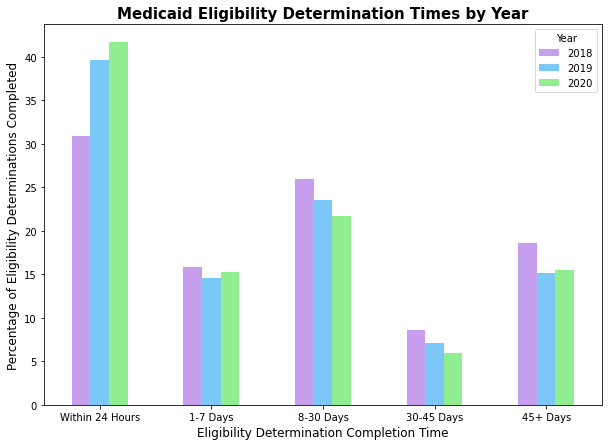

In [61]:
nat_means.plot(kind="bar", stacked=False, figsize=(10,7), color=['#C79FEF', "#7BC8F6", "#90EE90"])  #creating a stacked bar chart based on queried data
plt.title("Medicaid Eligibility Determination Times by Year", fontsize=15, fontweight="bold")  #adding a plot title
plt.ylabel("Percentage of Eligibility Determinations Completed", fontsize=12)  #adding a y axis label
plt.xlabel("Eligibility Determination Completion Time", fontsize=12)  #adding an x axis label
ticks=np.arange(len(nat_means))
plt.yticks(fontsize=10)
plt.xticks(ticks=ticks, labels=["Within 24 Hours", "1-7 Days", "8-30 Days", "30-45 Days", "45+ Days"], fontsize=10, rotation=0)
#plt.legend(fontsize=10)
#plt.annotate("Source: Centers for Medicare and Medicaid Services", (0,0), (-80,-20), fontsize=20, 
             #xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()